# Download Data

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vitvhong","key":"38ef277ffe4590d13c1ba71939fab436"}'}

In [3]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/

In [4]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0


In [5]:
!unzip fruit-and-vegetable-image-recognition.zip -d /content/

Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: /content/test/apple/Image_1.jpg  
  inflating: /content/test/apple/Image_10.jpg  
  inflating: /content/test/apple/Image_2.jpg  
  inflating: /content/test/apple/Image_3.jpg  
  inflating: /content/test/apple/Image_4.jpg  
  inflating: /content/test/apple/Image_5.jpg  
  inflating: /content/test/apple/Image_6.JPG  
  inflating: /content/test/apple/Image_7.jpg  
  inflating: /content/test/apple/Image_8.jpg  
  inflating: /content/test/apple/Image_9.jpg  
  inflating: /content/test/banana/Image_1.jpg  
  inflating: /content/test/banana/Image_10.jpg  
  inflating: /content/test/banana/Image_2.jpg  
  inflating: /content/test/banana/Image_3.jpg  
  inflating: /content/test/banana/Image_4.jpg  
  inflating: /content/test/banana/Image_5.jpg  
  inflating: /content/test/banana/Image_6.jpg  
  inflating: /content/test/banana/Image_8.jpg  
  inflating: /content/test/banana/Image_9.jpg  
  inflating: /content/test/beetroot/Image_1.

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Training Image preprocessing

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/train',
    labels='inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64, 64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


# Validation Image Preprocessing

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/validation',
    labels='inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64, 64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


# Model

In [9]:
cnn = tf.keras.models.Sequential()

## Convolution Layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [17]:
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

## Training Phase

In [18]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,380,996 (12.90 MB)

 Trainable params: 3,380,996 (12.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_his = cnn.fit(x=training_set, validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.0298 - loss: 19.5742 - val_accuracy: 0.0456 - val_loss: 3.5827
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.0411 - loss: 3.5712 - val_accuracy: 0.0627 - val_loss: 3.5545
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.0400 - loss: 3.4973 - val_accuracy: 0.1140 - val_loss: 3.4253
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.0677 - loss: 3.3793 - val_accuracy: 0.2137 - val_loss: 3.0483
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.1011 - loss: 3.2405 - val_accuracy: 0.2507 - val_loss: 2.9015
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.1328 - loss: 3.1007 - val_accuracy: 0.3675 - val_loss: 2.5854
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.1590 - loss: 2.9729 - val_accuracy: 0.4444 - val_loss: 2.3022
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.2134 - loss: 2.7373 - val_accuracy: 0.5499 - 

# Evaluating Model

In [ ]:
training_loss , training_acc = cnn.evaluate(training_set)
print('Training Accuracy :', training_acc)
print('Training Loss :', training_loss)

98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 860ms/step - accuracy: 0.9430 - loss: 0.2148
Training Accuracy : 0.9444622993469238
Training Loss : 0.20297536253929138


In [ ]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation Accuracy :', val_acc)
print('Validation Loss :', val_loss)

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9227 - loss: 0.4629
Validation Accuracy : 0.9316239356994629
Validation Loss : 0.3709355890750885


In [ ]:
print("Validation set Accuracy: {} %".format(training_his.history['val_accuracy'][-1]*100))

Validation set Accuracy: 93.16239356994629 %


## Model Visualization

Text(0.5, 1.0, 'Training and Validation Accuracy')

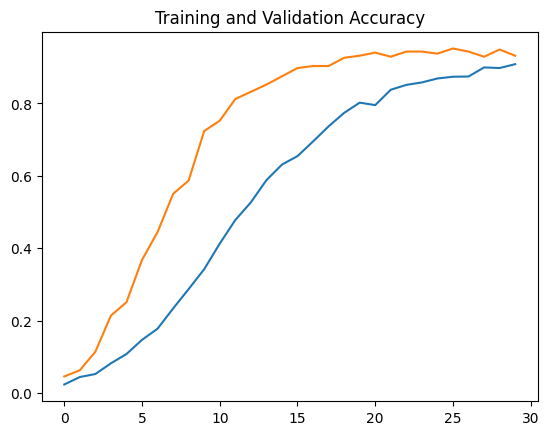

In [ ]:
epochs = range(30)
plt.plot(epochs, training_his.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, training_his.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

# Saving parameter

In [ ]:
cnn.save('model.h5')

In [ ]:
training_his.history

{'accuracy': [0.023434992879629135,
  0.04398074001073837,
  0.05232744663953781,
  0.0818619579076767,
  0.10754413902759552,
  0.14670947194099426,
  0.17752808332443237,
  0.2333868443965912,
  0.2869983911514282,
  0.3418940603733063,
  0.41252005100250244,
  0.47768861055374146,
  0.5264847278594971,
  0.5878009796142578,
  0.6308186054229736,
  0.6542536020278931,
  0.6947030425071716,
  0.7364366054534912,
  0.7736757397651672,
  0.8019261360168457,
  0.7951846122741699,
  0.8375601768493652,
  0.8510433435440063,
  0.8577849268913269,
  0.868699848651886,
  0.873515248298645,
  0.8741573095321655,
  0.8991974592208862,
  0.897592306137085,
  0.9081861972808838],
 'loss': [7.872113227844238,
  3.5532500743865967,
  3.4786252975463867,
  3.3420958518981934,
  3.2058897018432617,
  3.0478298664093018,
  2.9006285667419434,
  2.67956280708313,
  2.4704041481018066,
  2.235506534576416,
  2.015320062637329,
  1.7575726509094238,
  1.5820112228393555,
  1.3604716062545776,
  1.225238

## Recording History in json

In [ ]:
import json
with open('history.json', 'w') as f:
  json.dump(training_his.history, f)

# Test set Evaluation

In [19]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/test',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


## Reload saved parameter

In [20]:
model = tf.keras.models.load_model('model.h5')

In [21]:
test_loss, test_acc = model.evaluate(test_set)
print('Test accuracy:', test_acc)
print('Test loss: ', test_loss)

12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 718ms/step - accuracy: 0.9214 - loss: 0.3892
Test accuracy: 0.9331476092338562
Test loss:  0.3626868426799774


# Performing Prediction on Image

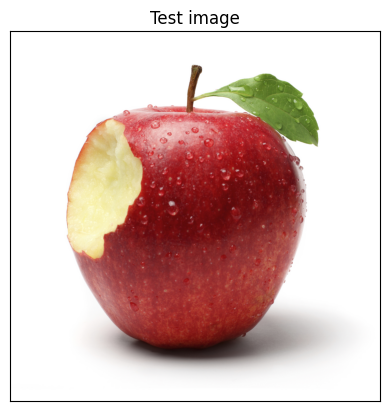

In [25]:
import cv2
image_path = '/content/test/apple/Image_1.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Test image')
plt.xticks([])
plt.yticks([])
plt.show()

In [27]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = model.predict(input_arr)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[9.9988961e-01 2.2643125e-10 3.9785014e-08 2.3757791e-07 3.6831202e-12
  4.4225857e-05 1.6706236e-08 2.3472422e-15 3.8068824e-09 1.0273274e-11
  1.7042111e-11 3.3429681e-09 2.1433348e-09 1.1459798e-10 2.9492138e-09
  1.7626824e-09 1.2275928e-08 1.2505525e-11 6.3673976e-11 6.0905436e-09
  5.5136526e-05 2.9651614e-11 1.0394504e-05 1.8577538e-07 5.1936906e-14
  1.3451133e-08 6.2495378e-09 1.5357625e-09 3.9414463e-08 2.4316098e-12
  2.0370164e-13 7.0125828e-12 7.7792777e-09 2.0072619e-08 4.1496366e-09
  9.2223201e-11]]


In [28]:
predictions.shape

(1, 36)

In [29]:
result_index = np.argmax(predictions)
print(result_index)

0


# Test with another image

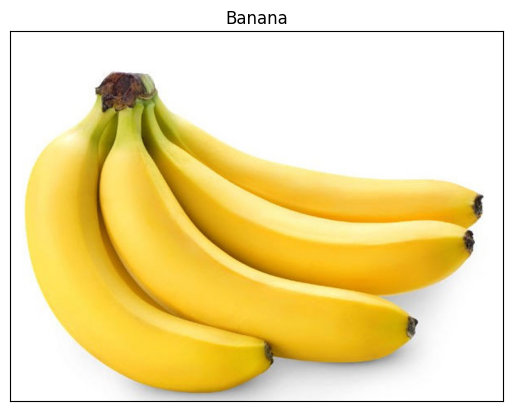

In [31]:
image_path = 'banana.png'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Banana')
plt.xticks([])
plt.yticks([])
plt.show()

In [36]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.expand_dims(input_arr, axis=0)
predictions = model.predict([input_arr])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
[[8.2894456e-09 9.9971133e-01 2.2010701e-11 5.0331973e-08 3.3010686e-10
  7.6258281e-08 5.5717253e-10 4.6140221e-07 6.2491017e-13 4.8793193e-08
  1.7729253e-08 4.5294584e-11 2.0073665e-09 2.1396505e-07 9.2188390e-09
  1.4062648e-09 2.2882470e-07 2.3034740e-04 6.2209865e-10 2.5454952e-08
  1.3411407e-07 2.2594948e-07 2.8003906e-09 1.1501234e-07 2.1843881e-10
  3.0236233e-08 1.0063328e-11 5.5524473e-05 1.4568687e-10 8.5523607e-07
  4.1071258e-10 2.9433642e-07 2.6541140e-09 4.6682744e-12 3.5220971e-09
  5.4176336e-10]]


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(1, 64, 64, 3))',)
  warnings.warn(msg)


In [37]:
index_result = np.argmax(predictions)
print(index_result)

1


# Chatbots

In [38]:
label_names = validation_set.class_names
print(label_names)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [52]:
def chatbot_image_classifier(image_path, model, label_names):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title('Banana')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.expand_dims(input_arr, axis=0)


    predictions = model.predict(input_arr)
    predicted_index = np.argmax(predictions)
    predicted_label = label_names[predicted_index]

    return f"Ảnh này là {predicted_label}."

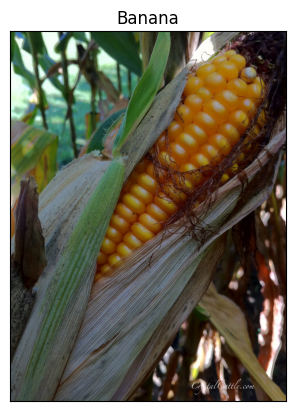

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


'Ảnh này là corn.'

In [53]:
chatbot_image_classifier('/content/test/corn/Image_10.jpg',model, label_names)